# **1. Setup & Data Upload**

In [ ]:
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
uploaded = files.upload()
filename = next(iter(uploaded))
print(f"✅ Uploaded: {filename}")

if filename.endswith('.xlsx'):
    df = pd.read_excel(io.BytesIO(uploaded[filename]))
else:
    df = pd.read_csv(io.BytesIO(uploaded[filename]))

print("\n🔍 First 5 rows:")
display(df.head())

Saving Coffee Shop Sales.xlsx to Coffee Shop Sales (2).xlsx
✅ Uploaded: Coffee Shop Sales (2).xlsx

🔍 First 5 rows:


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


# **2. Data Cleaning & Preparation**

In [ ]:
# Convert transaction_date
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

In [ ]:
# Handle all possible time formats
try:
    # Case 1: Already in datetime format
    df['hour'] = pd.to_datetime(df['transaction_time']).dt.hour
except:
    try:
        # Case 2: Time objects (fix for NameError)
        from datetime import time
        if isinstance(df['transaction_time'].iloc[0], time):
            df['hour'] = df['transaction_time'].apply(lambda x: x.hour)
        else:
            # Case 3: String timestamps
            df['hour'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.hour
    except:
        # Case 4: Fallback for any format
        df['hour'] = df['transaction_time'].astype(str).str.extract(r'(\d{1,2})')[0].astype(int)

In [ ]:
# Calculate metrics (adjust cost calculation as needed)
df['revenue'] = df['unit_price'] * df['transaction_qty']
df['cost'] = df['revenue'] * 0.6  # Assuming 40% profit margin
df['profit'] = df['revenue'] - df['cost']
df['profit_margin'] = (df['profit']/df['revenue']).round(2)

# **3. Data Analysis**

In [ ]:
print("\n🔎 DATA SNAPSHOT:")
display(df.head(3))

print("\n🕒 BUSIEST HOURS:")
display(df['hour'].value_counts().head(5).to_frame('Transactions'))

print("\n🏆 TOP PRODUCTS BY PROFIT:")
top_products = df.groupby(['product_category','product_type'])['profit'].sum().nlargest(5)
display(top_products.to_frame('Total Profit'))

print("\n📍 STORE PERFORMANCE:")
store_perf = df.groupby('store_location')['profit'].sum().sort_values()
display(store_perf.to_frame('Store Profit'))


🔎 DATA SNAPSHOT:


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,hour,revenue,cost,profit,profit_margin
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,7,6.0,3.60,2.40,0.4
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,7,6.2,3.72,2.48,0.4
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,7,9.0,5.40,3.60,0.4



🕒 BUSIEST HOURS:


,Transactions
hour,
10,18545
9,17764
8,17654
7,13428
11,9766



🏆 TOP PRODUCTS BY PROFIT:


,,Total Profit
product_category,product_type,
Coffee,Barista Espresso,36562.48
Tea,Brewed Chai tea,30832.78
Drinking Chocolate,Hot chocolate,28966.40
Coffee,Gourmet brewed coffee,28013.84
Tea,Brewed Black tea,19172.80



📍 STORE PERFORMANCE:


,Store Profit
store_location,
Lower Manhattan,92022.900
Astoria,92897.564
Hell's Kitchen,94604.468


# **4. VISUALIZATIONS**

In [ ]:
plt.figure(figsize=(16,12))
plt.suptitle('Coffee Shop Performance Analysis', y=1.02, fontsize=16)

Text(0.5, 1.02, 'Coffee Shop Performance Analysis')

<Figure size 1600x1200 with 0 Axes>

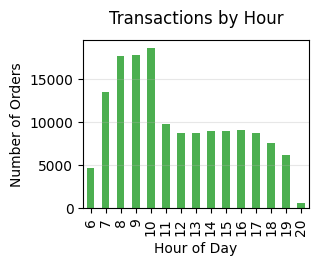

In [ ]:
# Plot 1: Sales by Hour
plt.subplot(2,2,1)
df['hour'].value_counts().sort_index().plot(kind='bar', color='#4CAF50')
plt.title('Transactions by Hour', pad=12)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.grid(axis='y', alpha=0.3)

Text(0, 0.5, '')

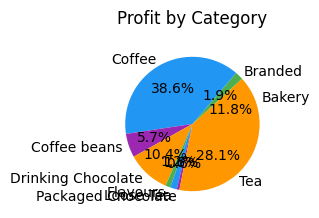

In [ ]:
# Plot 2: Product Category Profit
plt.subplot(2,2,2)
df.groupby('product_category')['profit'].sum().plot(kind='pie', autopct='%1.1f%%',
                                                  colors=['#FF9800','#4CAF50','#2196F3','#9C27B0'])
plt.title('Profit by Category', pad=12)
plt.ylabel('')

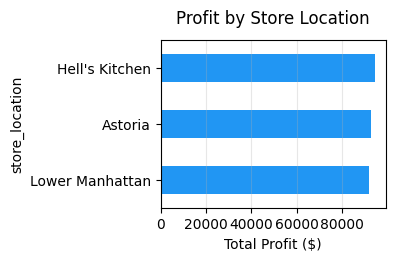

In [ ]:
# Plot 3: Store Performance
plt.subplot(2,2,3)
store_perf.plot(kind='barh', color='#2196F3')
plt.title('Profit by Store Location', pad=12)
plt.xlabel('Total Profit ($)')
plt.grid(axis='x', alpha=0.3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

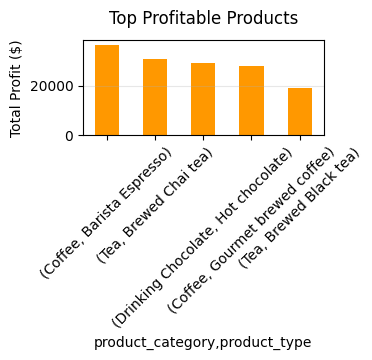

In [ ]:
# Plot 4: Top Products
plt.subplot(2,2,4)
top_products.plot(kind='bar', color='#FF9800')
plt.title('Top Profitable Products', pad=12)
plt.xticks(rotation=45)
plt.ylabel('Total Profit ($)')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('coffee_analysis.png', bbox_inches='tight', dpi=150)
files.download('coffee_analysis.png')


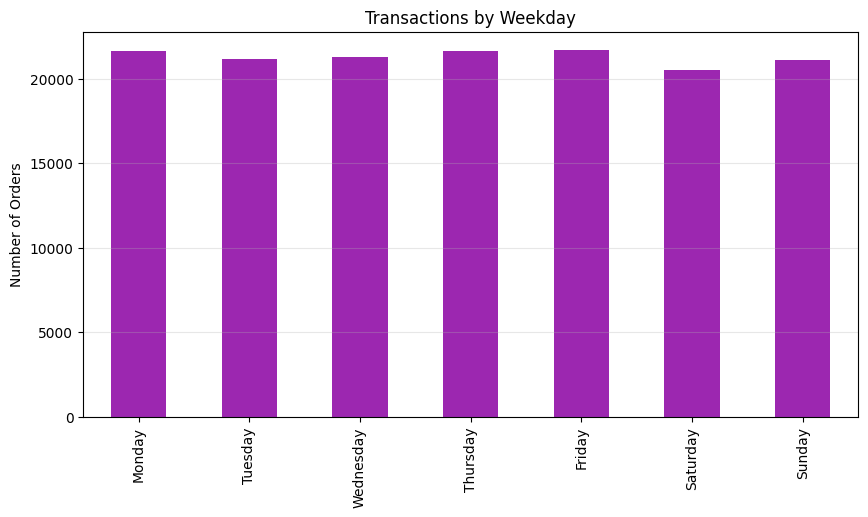

In [ ]:
# Weekly trends analysis
df['day_of_week'] = df['transaction_date'].dt.day_name()
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

plt.figure(figsize=(10,5))
df['day_of_week'].value_counts().loc[weekday_order].plot(kind='bar', color='#9C27B0')
plt.title('Transactions by Weekday')
plt.xlabel('')
plt.ylabel('Number of Orders')
plt.grid(axis='y', alpha=0.3)
plt.show()

# **5. EXPORT**

In [ ]:
df.to_csv('cleaned_coffee_data.csv', index=False)
files.download('cleaned_coffee_data.csv')

print("\n✅ ANALYSIS COMPLETE! Downloaded:")
print("- coffee_analysis.png (all visualizations)")
print("- cleaned_coffee_data.csv (processed data)")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ ANALYSIS COMPLETE! Downloaded:
- coffee_analysis.png (all visualizations)
- cleaned_coffee_data.csv (processed data)
